In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Path to your zip file
zip_path = '/content/drive/My Drive/train.zip'

# Verify if the file exists and is accessible
if os.path.exists(zip_path):
    print("File exists!")
else:
    print("File does not exist. Check the path.")


File exists!


In [ ]:
import zipfile

# Function to extract the zip file
def extract_zip(zip_path, extract_to):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print("Extraction successful!")
    except zipfile.BadZipFile:
        print("Error: Bad zip file. The file is not a valid zip file.")
    except Exception as e:
        print(f"Error: {e}")

# Extracting the zip file
extract_to = '/content/train'
extract_zip(zip_path, extract_to)

# Check if extraction was successful
if os.path.exists(extract_to):
    print("Extraction folder exists.")
else:
    print("Extraction failed. Check the zip file and path.")


Extraction successful!
Extraction folder exists.


In [ ]:

# Split the dataset into training and testing sets
image_files = [os.path.join(train, file) for file in os.listdir(extract_to) if file.endswith('.jpg')]

In [ ]:
imagefiles1 = image_files[:25000]

In [ ]:
def compute_hog_features(image):
    image = rgb2gray(image)  # Chuyển đổi sang ảnh xám
    features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), block_norm='L2-Hys',
                   transform_sqrt=True)
    return features

In [ ]:
# Hàm để tính toán vector đặc trưng HoG cho một hình ảnh
def compute_hog_feature(image):
    # Chuyển ảnh sang ảnh grayscale
    gray_image = rgb2gray(image)

    # Trích xuất đặc trưng HOG
    features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2,2), block_norm='L2-Hys',
                              visualize=True, transform_sqrt=True)

    # Cân bằng độ sáng của ảnh HOG
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 20))

    return features, hog_image_rescaled

In [ ]:
total_images = len(imagefiles1)
processed_images = 0

In [ ]:
import os

# Check the contents of the extraction directory
extracted_files = os.listdir(extract_to)
print(f"Files in '{extract_to}': {extracted_files}")

# Check if there is a 'train' directory inside the extraction directory
train_subdir = os.path.join(extract_to, 'train')
if os.path.exists(train_subdir) and os.path.isdir(train_subdir):
    print(f"Files in '{train_subdir}': {os.listdir(train_subdir)}")
else:
    print(f"No 'train' directory found in '{extract_to}'.")


Files in '/content/train': ['train']
Files in '/content/train/train': ['cat.3046.jpg', 'cat.12152.jpg', 'dog.11827.jpg', 'dog.4036.jpg', 'dog.11294.jpg', 'cat.1919.jpg', 'cat.8323.jpg', 'dog.794.jpg', 'dog.2266.jpg', 'cat.8918.jpg', 'cat.9686.jpg', 'dog.5212.jpg', 'dog.6850.jpg', 'dog.6255.jpg', 'dog.3392.jpg', 'dog.7702.jpg', 'dog.8629.jpg', 'cat.760.jpg', 'cat.11562.jpg', 'dog.3030.jpg', 'cat.10217.jpg', 'dog.7447.jpg', 'cat.2589.jpg', 'dog.6724.jpg', 'dog.11836.jpg', 'dog.10892.jpg', 'dog.7997.jpg', 'cat.5905.jpg', 'dog.2747.jpg', 'cat.5278.jpg', 'cat.1276.jpg', 'cat.3773.jpg', 'cat.8195.jpg', 'dog.10848.jpg', 'cat.2749.jpg', 'cat.2984.jpg', 'dog.3629.jpg', 'dog.1882.jpg', 'dog.3550.jpg', 'cat.9015.jpg', 'dog.3770.jpg', 'cat.568.jpg', 'cat.4346.jpg', 'dog.10409.jpg', 'dog.6682.jpg', 'dog.8919.jpg', 'cat.5852.jpg', 'dog.11556.jpg', 'dog.5301.jpg', 'dog.7557.jpg', 'cat.340.jpg', 'dog.2937.jpg', 'cat.3535.jpg', 'cat.1638.jpg', 'cat.6666.jpg', 'cat.9332.jpg', 'dog.10271.jpg', 'cat.10930

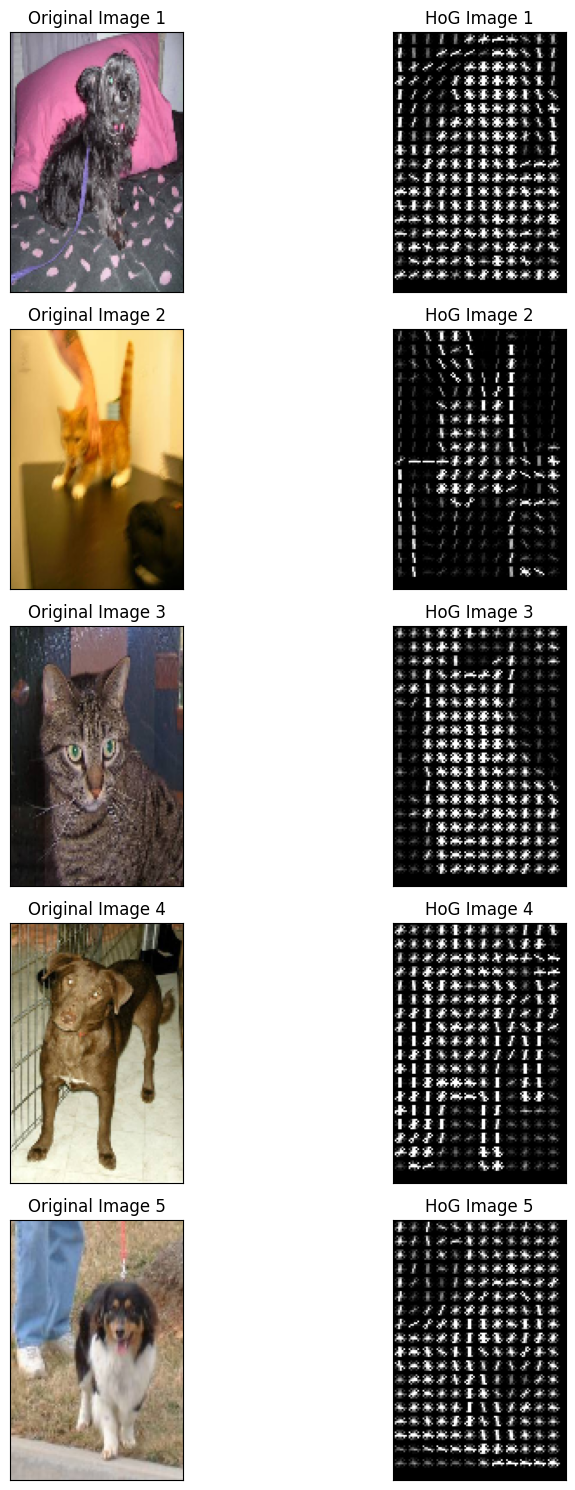

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import cv2
import os

# Function to compute HoG features
def compute_hog_feature(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Compute HoG features
    features, hog_image = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return features, hog_image_rescaled

# Path to the directory containing images
image_dir = os.path.join(extract_to, 'train') # Assuming 'extract_to' is defined elsewhere

# Load image file paths
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')] # Pass the directory path here

# Extract numeric part for sorting, handling potential non-numeric filenames
image_files = sorted(image_files, key=lambda x: int(os.path.splitext(x)[0].split('.')[1]) if os.path.splitext(x)[0].split('.')[1].isdigit() else 0)

image_files = [os.path.join(image_dir, img_name) for img_name in image_files]

# ... (rest of the code remains the same)

# Check if we have at least 5 images
num_images_to_display = 5
if len(image_files) < num_images_to_display:
    raise ValueError(f"Not enough images to display. Found only {len(image_files)} images.")

# Only take the first 5 images
image_files = image_files[:num_images_to_display]

# Initialize lists to store original and HoG images
original_images = []
hog_images = []

# Process each image
for image_path in image_files:
    image = cv2.imread(image_path)  # Read image using OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    image = cv2.resize(image, (100, 150))  # Resize image to 100x150
    features, hog_image = compute_hog_feature(image)  # Compute HoG features
    original_images.append(image)
    hog_images.append(hog_image)

# Display original and HoG images
fig, axes = plt.subplots(nrows=num_images_to_display, ncols=2, figsize=(10, 15),
                         subplot_kw={'xticks': [], 'yticks': []})

for i in range(num_images_to_display):
    axes[i, 0].imshow(original_images[i])
    axes[i, 0].set_title(f'Original Image {i+1}')
    axes[i, 1].imshow(hog_images[i], cmap='gray')
    axes[i, 1].set_title(f'HoG Image {i+1}')

plt.tight_layout()
plt.show()

In [ ]:
hog_features_list = []
labels = []
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')] # Pass the directory path here

# Extract numeric part for sorting, handling potential non-numeric filenames
image_files = sorted(image_files, key=lambda x: int(os.path.splitext(x)[0].split('.')[1]) if os.path.splitext(x)[0].split('.')[1].isdigit() else 0)

# Create the full paths to the images
image_files = [os.path.join(image_dir, img_name) for img_name in image_files]

hog_features_list = []
labels = []
for image_path in image_files: # Use image_files, not imagefiles
    processed_images += 1
    print(f"Processing image {processed_images}/{total_images}", end="\r")
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (100,150))
    features, _ = compute_hog_feature(image) # Call the correct function name and unpack the result
    hog_features_list.append(features)

    if 'cat' in os.path.basename(image_path):
        labels.append(0)
    elif 'dog' in os.path.basename(image_path):
        labels.append(1)
    else:
        raise ValueError(f"Invalid image file: {image_path}")

In [ ]:
X = np.array(hog_features_list)
y = np.array(labels)

In [ ]:
print(X.shape)
print(y.shape)

(0,)
(0,)
